# Decision Stumps – Theory & Implementation
This notebook explains what a Decision Stump is and shows how to create one manually and using Python.

### What is a Decision Stump?
A **Decision Stump** is a one-level decision tree (only one split). It selects the best feature and threshold using impurity or weighted error.

### Decision Stump Formula for AdaBoost

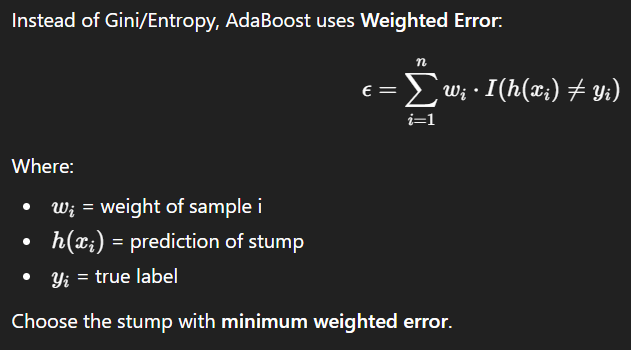

### Step-by-Step: Creating a Decision Stump
1. Try all features
2. Try all thresholds
3. Compute weighted error
4. Select the best split

In [1]:
import numpy as np
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'Age': [18, 22, 25, 30, 35, 40],
    'Income': [30, 35, 40, 45, 50, 55],
    'Label': [1, 1, 1, -1, -1, -1]
})

df

,Age,Income,Label
0,18,30,1
1,22,35,1
2,25,40,1
3,30,45,-1
4,35,50,-1
5,40,55,-1


### Function to compute weighted error for splits

In [2]:
def compute_weighted_error(feature, threshold, df, weights):
    predictions = np.where(df[feature] <= threshold, 1, -1)
    misclassified = predictions != df['Label']
    return np.sum(weights[misclassified])

### Search Best Decision Stump

In [3]:
features = ['Age', 'Income']
weights = np.ones(len(df)) / len(df)

best_feature = None
best_threshold = None
best_error = float('inf')

for f in features:
    for threshold in df[f]:
        error = compute_weighted_error(f, threshold, df, weights)
        if error < best_error:
            best_error = error
            best_feature = f
            best_threshold = threshold

best_feature, best_threshold, best_error

('Age', 25, np.float64(0.0))

### Final Decision Stump

In [4]:
print(f"Decision Stump: if {best_feature} <= {best_threshold} then +1 else -1")

Decision Stump: if Age <= 25 then +1 else -1
